# Baseline model with web_scraped_data




In [0]:
!pip install --upgrade -q gspread
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [4]:
# Open our new sheet and read some data.
worksheet = gc.open('web_scarping_csv_140').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df=pd.DataFrame.from_records(rows)
df.head(n=4)

df.columns = df.iloc[0]
df=df.drop([0])
df.head(n=5)

[['header', 'sub_header', 'text_content', 'author'], ['Bowies konstskolahar stängt för gott', '', '\nDaniel Swedin: Rockens kameleont gör sorti med en fantastisk slutscen\nSå blev hans senaste skiva hans sista.\nFör en artist så upptagen med spelet mellan liv och död, uppgång och fall, så borde vi kanske ta emot budet om David Bowies bortgång med ett "förstås!"\nDet är en fantastisk slutscen i den popteater han i 45 år gjort till sin karriär. Singeln från skivan heter ju till och med Lazarus, en man som enligt Johannesevangeliet blir uppväckt från de döda av Jesus.\nMen det finns faktiskt ingenting som kunde förbereda mig på det här. Han är borta. Det blir inget mer.\n"En enmanskonstskola för ungar som aldrig kom in på någon konstskola". Så beskrev filmkritikern Stephen Dalton den brittiske popartisten i en text i julas.\nDet är ingen dum formulering. Det var via Bowie jag hittade vidare till Hanif Kureishi, O\'Jays, Fritz Lang, Collin MacInnes, Scott Walker, Kenneth Anger, Jean Genet 

,header,sub_header,text_content,author
1,Bowies konstskolahar stängt för gott,,\nDaniel Swedin: Rockens kameleont gör sorti m...,DANIEL SWEDIN
2,Matfusket är en miljardaffär,,\nDitt kravmärkta svenska kött kan i själva ve...,DANIEL SWEDIN
3,Lågavlönade ska packa Ica-kassen,,\nDe enkla jobben är för få och lönerna är för...,DANIEL SWEDIN
4,Samhället måste våga möta hatet,,\nEfter bombdådet i Oslo och massakern på Utøy...,DANIEL SWEDIN
5,Vi måste knäcka IS på hemmaplan,,\n■ Efter terrorattentaten i Bryssel är det en...,DANIEL SWEDIN


## Baseline dumi classiffier

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve



y = df.author
X = df.text_content
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12345)
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [38]:
print('Training Performance')
print('-> Acc:', accuracy_score(y_train, dummy.predict(X_train)))

Training Performance
-> Acc: 0.35714285714285715


## Baseline bag of words

In [0]:
df.columns = df.iloc[0]
df=df.drop([0])
df.head(n=5)

,,header,sub_header,text_content,author
1,0,Bowies konstskolahar stängt för gott,,\nDaniel Swedin: Rockens kameleont gör sorti m...,DANIEL SWEDIN
2,1,Matfusket är en miljardaffär,,\nDitt kravmärkta svenska kött kan i själva ve...,DANIEL SWEDIN
3,2,Lågavlönade ska packa Ica-kassen,,\nDe enkla jobben är för få och lönerna är för...,DANIEL SWEDIN
4,3,Samhället måste våga möta hatet,,\nEfter bombdådet i Oslo och massakern på Utøy...,DANIEL SWEDIN
5,4,Vi måste knäcka IS på hemmaplan,,\n■ Efter terrorattentaten i Bryssel är det en...,DANIEL SWEDIN


In [0]:
df = df.rename(columns={'text_content': 'Text', 'author': 'Label'})

In [0]:
import numpy as np
import matplotlib.pyplot as plt


# emulate your ex3.Severity.value_counts()
df.Label.value_counts()

INGVAR PERSSON      50
DANIEL SWEDIN       50
PERNILLA ERICSON    40
Name: Label, dtype: int64

In [0]:
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt

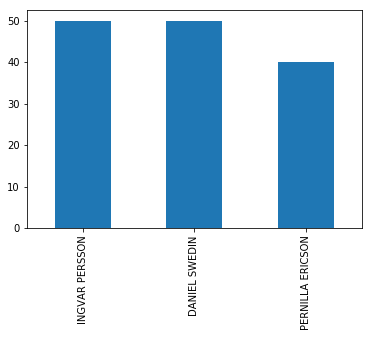

In [0]:
pd.value_counts(df['Label']).plot.bar()


## Model 

In [0]:
df.Text.tolist()

['\nDaniel Swedin: Rockens kameleont gör sorti med en fantastisk slutscen\nSå blev hans senaste skiva hans sista.\nFör en artist så upptagen med spelet mellan liv och död, uppgång och fall, så borde vi kanske ta emot budet om David Bowies bortgång med ett "förstås!"\nDet är en fantastisk slutscen i den popteater han i 45 år gjort till sin karriär. Singeln från skivan heter ju till och med Lazarus, en man som enligt Johannesevangeliet blir uppväckt från de döda av Jesus.\nMen det finns faktiskt ingenting som kunde förbereda mig på det här. Han är borta. Det blir inget mer.\n"En enmanskonstskola för ungar som aldrig kom in på någon konstskola". Så beskrev filmkritikern Stephen Dalton den brittiske popartisten i en text i julas.\nDet är ingen dum formulering. Det var via Bowie jag hittade vidare till Hanif Kureishi, O\'Jays, Fritz Lang, Collin MacInnes, Scott Walker, Kenneth Anger, Jean Genet och William Burroughs.\nNu är skolan stängd.\nMen vem var han? En utställning som visats i London

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords_swedish = nltk.corpus.stopwords.words('swedish')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
['DANIEL SWEDIN','PERNILLA ERICSON','INGVAR PERSSON']
from IPython import embed

import re
strings=list()
for string in df.Text.tolist():
  string=string.lower().replace('daniel swedin','')
  string=string.lower().replace('daniel swedin','')
  string=string.lower().replace('daniel swedin','')
  string=strings.append(string)
  
  

strings = [word for word in strings if word.lower() not in stopwords_swedish]


In [0]:
strings

['\n: rockens kameleont gör sorti med en fantastisk slutscen\nså blev hans senaste skiva hans sista.\nför en artist så upptagen med spelet mellan liv och död, uppgång och fall, så borde vi kanske ta emot budet om david bowies bortgång med ett "förstås!"\ndet är en fantastisk slutscen i den popteater han i 45 år gjort till sin karriär. singeln från skivan heter ju till och med lazarus, en man som enligt johannesevangeliet blir uppväckt från de döda av jesus.\nmen det finns faktiskt ingenting som kunde förbereda mig på det här. han är borta. det blir inget mer.\n"en enmanskonstskola för ungar som aldrig kom in på någon konstskola". så beskrev filmkritikern stephen dalton den brittiske popartisten i en text i julas.\ndet är ingen dum formulering. det var via bowie jag hittade vidare till hanif kureishi, o\'jays, fritz lang, collin macinnes, scott walker, kenneth anger, jean genet och william burroughs.\nnu är skolan stängd.\nmen vem var han? en utställning som visats i london och berlin, 

In [0]:
# https://www.linkedin.com/pulse/text-classification-using-bag-words-approach-nltk-scikit-rajendran

In [0]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=10000)
X = matrix.fit_transform(strings).toarray()
y = df.Label.tolist()


# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# predict class
y_pred = classifier.predict(X_test)


In [0]:
print(y_pred)
print(y_test)

['PERNILLA ERICSON' 'DANIEL SWEDIN' 'DANIEL SWEDIN' 'INGVAR PERSSON'
 'DANIEL SWEDIN' 'DANIEL SWEDIN' 'DANIEL SWEDIN' 'DANIEL SWEDIN'
 'PERNILLA ERICSON' 'DANIEL SWEDIN' 'DANIEL SWEDIN' 'DANIEL SWEDIN'
 'DANIEL SWEDIN' 'DANIEL SWEDIN' 'INGVAR PERSSON' 'DANIEL SWEDIN'
 'PERNILLA ERICSON' 'DANIEL SWEDIN' 'DANIEL SWEDIN' 'INGVAR PERSSON'
 'INGVAR PERSSON' 'DANIEL SWEDIN' 'INGVAR PERSSON' 'DANIEL SWEDIN'
 'INGVAR PERSSON' 'INGVAR PERSSON' 'DANIEL SWEDIN' 'DANIEL SWEDIN'
 'PERNILLA ERICSON' 'DANIEL SWEDIN' 'DANIEL SWEDIN' 'DANIEL SWEDIN'
 'DANIEL SWEDIN' 'INGVAR PERSSON' 'DANIEL SWEDIN']
['PERNILLA ERICSON', 'INGVAR PERSSON', 'INGVAR PERSSON', 'INGVAR PERSSON', 'INGVAR PERSSON', 'DANIEL SWEDIN', 'DANIEL SWEDIN', 'PERNILLA ERICSON', 'PERNILLA ERICSON', 'PERNILLA ERICSON', 'DANIEL SWEDIN', 'INGVAR PERSSON', 'INGVAR PERSSON', 'PERNILLA ERICSON', 'INGVAR PERSSON', 'DANIEL SWEDIN', 'PERNILLA ERICSON', 'DANIEL SWEDIN', 'DANIEL SWEDIN', 'INGVAR PERSSON', 'INGVAR PERSSON', 'DANIEL SWEDIN', 'INGVAR 

In [0]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

In [0]:
accuracy

0.5714285714285714